**Assignment-13: Try various CNN networks on MNIST dataset [M]¶**

Three different architecture of CNN network on MNIST datasets.

**Objective:**

    1) 3_ConvNets with kernel 3x3
    2) 5_ConvNets with kernel 5x5
    3) 7_ConvnNets with kernel 2x2

In [0]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

from datetime import datetime
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from keras.initializers import he_normal
from keras.layers.normalization import BatchNormalization


batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
print(y_train.shape)

(60000, 10)


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty):
  fig = plt.figure( facecolor='y', edgecolor='k')
  plt.plot(x, vy, 'b', label="Validation Loss")
  plt.plot(x, ty, 'r', label="Train Loss")
  plt.xlabel('Epochs') 
  plt.ylabel('Categorical Crossentropy Loss')
  plt.legend()
  plt.grid()
  plt.show()

**1) Model:3_ConvNets with kernel 3x3**

In [0]:
convnet3=Sequential() # Initializing the model

# First ConvNet
convnet3.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=input_shape))
convnet3.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
convnet3.add(Dropout(0.25))
convnet3.add(Conv2D(128,kernel_size=(3,3),activation='relu'))

#maxpooling by (2,2 ) ,dropout,flattening

convnet3.add(MaxPooling2D(pool_size=(2,2)))
convnet3.add(Dropout(0.25))
convnet3.add(Flatten())

#hidden_layer

convnet3.add(Dense(256,activation='relu',kernel_initializer=he_normal(seed=None)))
convnet3.add(Dropout(0.5))
convnet3.add(Dense(num_classes,activation='softmax'))
print(convnet3.summary())


W0813 11:54:30.469006 140003642705792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0813 11:54:30.505269 140003642705792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0813 11:54:30.511998 140003642705792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0813 11:54:30.554095 140003642705792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0813 11:54:30.563224 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 11, 11, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 15488)             0         
__________

In [0]:
#Model compilation
convnet3.compile(optimizer=keras.optimizers.Adam(),
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
convnet3_history=convnet3.fit(x_train,y_train,batch_size=batch_size,
                             epochs=epochs,
                             verbose=1,
                             validation_data=(x_test, y_test))

W0813 11:54:30.686633 140003642705792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0813 11:54:30.801898 140003642705792 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 18s 294us/step - loss: 0.1846 - acc: 0.9429 - val_loss: 0.0429 - val_acc: 0.9853
Epoch 2/12
60000/60000 [==============================] - 10s 169us/step - loss: 0.0625 - acc: 0.9815 - val_loss: 0.0292 - val_acc: 0.9901
Epoch 3/12
60000/60000 [==============================] - 10s 169us/step - loss: 0.0447 - acc: 0.9861 - val_loss: 0.0257 - val_acc: 0.9908
Epoch 4/12
60000/60000 [==============================] - 10s 170us/step - loss: 0.0364 - acc: 0.9888 - val_loss: 0.0255 - val_acc: 0.9922
Epoch 5/12
60000/60000 [==============================] - 10s 169us/step - loss: 0.0306 - acc: 0.9905 - val_loss: 0.0239 - val_acc: 0.9920
Epoch 6/12
60000/60000 [==============================] - 10s 170us/step - loss: 0.0268 - acc: 0.9911 - val_loss: 0.0250 - val_acc: 0.9918
Epoch 7/12
60000/60000 [==============================] - 10s 171us/step - loss: 0.0232 - acc: 0.9923 - val_loss: 0.

test score : 0.030047715408694057
test sccuracy : 0.9924


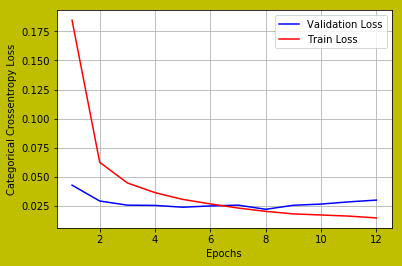

In [0]:
#evaluating model

score=convnet3.evaluate(x_test,y_test,verbose=0)
test_score3=score[0]
test_accuracy3=score[1]
train_accuracy3=max(convnet3_history.history['acc'])
print('test score :',test_score3)
print('test sccuracy :',test_accuracy3)
# error plot
x=list(range(1,epochs+1))
vy=convnet3_history.history['val_loss'] #validation loss
ty=convnet3_history.history['loss'] # train loss
plt_dynamic(x, vy, ty)

**2 Model:5 ConvNet with kernel_size=(5x5)**

In [0]:
convnet5=Sequential() # Initializing the model

# First ConvNet
convnet5.add(Conv2D(32,kernel_size=(5,5),
                    activation='relu',
                    padding='same',
                    input_shape=input_shape))

convnet5.add(Conv2D(64,kernel_size=(5,5),
                    padding='same',
                    activation='relu'))#Second Convnet
convnet5.add(MaxPooling2D(pool_size=(2,2)))
convnet5.add(Dropout(0.25))

convnet5.add(Conv2D(96,kernel_size=(5,5),
                    padding='same',
                   activation='relu'))  # 3rd ConvNet
#maxpooling by (2,2 ) ,dropout,flattening
convnet5.add(MaxPooling2D(pool_size=(2,2)))
convnet5.add(Dropout(0.25))

convnet5.add(Conv2D(128,kernel_size=(5,5),
                    padding='same',
                    activation='relu'))#fourth Convnet
convnet5.add(MaxPooling2D(pool_size=(2,2)))
convnet5.add(Dropout(0.25))
convnet5.add(Conv2D(164,kernel_size=(5,5),
                    padding='same',
                    activation='relu'))#fifth Convnet
convnet5.add(MaxPooling2D(pool_size=(2,2)))
convnet5.add(Dropout(0.25))
convnet5.add(Flatten())

#hidden_layer
convnet5.add(Dense(256,
                   activation='relu',kernel_initializer=he_normal(seed=None)))
convnet5.add(BatchNormalization())
convnet5.add(Dropout(0.5))
convnet5.add(Dense(num_classes,activation='softmax'))
print(convnet5.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 96)        153696    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 96)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 96)          0         
__________

In [0]:
#Model compilation
start = datetime.now()
convnet5.compile(optimizer=keras.optimizers.Adam(),
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
convnet5_history=convnet5.fit(x_train,y_train,batch_size=batch_size,
                             epochs=epochs,
                             verbose=1,
                             validation_data=(x_test, y_test))
print("Time taken to run this cell :", datetime.now() - start)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 12s 198us/step - loss: 0.3049 - acc: 0.9015 - val_loss: 0.0398 - val_acc: 0.9874
Epoch 2/12
60000/60000 [==============================] - 10s 174us/step - loss: 0.0666 - acc: 0.9807 - val_loss: 0.0252 - val_acc: 0.9918
Epoch 3/12
60000/60000 [==============================] - 10s 174us/step - loss: 0.0481 - acc: 0.9864 - val_loss: 0.0282 - val_acc: 0.9915
Epoch 4/12
60000/60000 [==============================] - 10s 174us/step - loss: 0.0390 - acc: 0.9886 - val_loss: 0.0213 - val_acc: 0.9932
Epoch 5/12
60000/60000 [==============================] - 10s 174us/step - loss: 0.0309 - acc: 0.9911 - val_loss: 0.0211 - val_acc: 0.9937
Epoch 6/12
60000/60000 [==============================] - 10s 174us/step - loss: 0.0307 - acc: 0.9909 - val_loss: 0.0187 - val_acc: 0.9949
Epoch 7/12
60000/60000 [==============================] - 10s 175us/step - loss: 0.0257 - acc: 0.9924 - val_loss: 0.

test score : 0.020020218063240464
test Accuracy : 0.9938


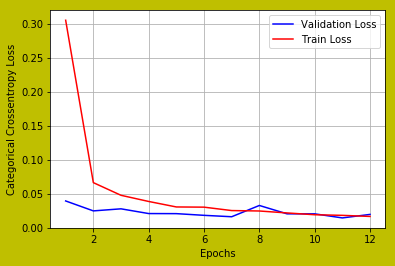

In [0]:
#evaluating model
score=convnet5.evaluate(x_test,y_test,verbose=0)
test_score5=score[0]
test_accuracy5=score[1]
train_accuracy5=max(convnet5_history.history['acc'])
print('test score :',test_score5)
print('test Accuracy :',test_accuracy5)
# error plot
x=list(range(1,epochs+1))
vy=convnet5_history.history['val_loss'] #validation loss
ty=convnet5_history.history['loss'] # train loss
plt_dynamic(x, vy, ty)

**3 Model: 7 ConvNet with kernel_size=(2x2)**

In [0]:
convnet7=Sequential() # Initializing the model

# First ConvNet
convnet7.add(Conv2D(16,kernel_size=(2,2),
                    activation='relu',
                    padding='same',strides=(1,1),
                    input_shape=input_shape))


convnet7.add(Conv2D(32,kernel_size=(2,2),
                    padding='same',strides=(2,2),
                    activation='relu'))#Second Convnet
#convnet7.add(MaxPooling2D(pool_size=(2,2)))
#convnet7.add(Dropout(0.25))

convnet7.add(Conv2D(64,kernel_size=(2,2),
                    padding='same',
                   activation='relu'))  # 3rd ConvNet
#maxpooling by (2,2 ) ,dropout,flattening
#convnet7.add(MaxPooling2D(pool_size=(2,2)))
convnet7.add(Dropout(0.15))

convnet7.add(Conv2D(96,kernel_size=(2,2),
                    padding='same',
                    activation='relu'))#fourth Convnet
convnet7.add(MaxPooling2D(pool_size=(2,2)))
convnet7.add(Dropout(0.39))
convnet7.add(Conv2D(128,kernel_size=(2,2),
                    padding='same',
                    activation='relu'))#fifth Convnet
convnet7.add(MaxPooling2D(pool_size=(2,2)))
convnet7.add(Dropout(0.3))
convnet7.add(Conv2D(164,kernel_size=(2,2),
                    padding='same',
                    activation='relu'))#sixth Convnet
convnet7.add(Conv2D(164,kernel_size=(2,2),
                    padding='same',strides=(1,1),
                    activation='relu'))#seventh Convnet

convnet7.add(MaxPooling2D(pool_size=(2,2)))
convnet7.add(Dropout(0.4))
convnet7.add(Flatten())

#hidden_layer
convnet7.add(Dense(256,
                   activation='relu',
                   kernel_initializer=he_normal(seed=None)))#1 hidden layer
convnet7.add(BatchNormalization())
convnet7.add(Dropout(0.5))
convnet7.add(Dense(148,
                   activation='relu',
                   kernel_initializer=he_normal(seed=None)))#2 hidden layer
convnet7.add(BatchNormalization())
convnet7.add(Dropout(0.5))
convnet7.add(Dense(128,
                   activation='relu',
                   kernel_initializer=he_normal(seed=None)))#3 hidden layer
convnet7.add(BatchNormalization())
convnet7.add(Dropout(0.5))
convnet7.add(Dense(num_classes,activation='softmax'))
print(convnet7.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 16)        80        
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 32)        2080      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        8256      
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 96)        24672     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 96)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 7, 7, 96)          0         
__________

In [0]:
#Model compilation
start=datetime.now()
convnet7.compile(optimizer=keras.optimizers.Adam(),
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
convnet7_history=convnet7.fit(x_train,y_train,batch_size=batch_size,
                             epochs=epochs,
                             verbose=1,
                             validation_data=(x_test, y_test))
print("Time taken to run this cell :", datetime.now() - start)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 10s 166us/step - loss: 1.9593 - acc: 0.3529 - val_loss: 0.7696 - val_acc: 0.6999
Epoch 2/12
60000/60000 [==============================] - 8s 131us/step - loss: 0.4815 - acc: 0.8555 - val_loss: 0.1117 - val_acc: 0.9697
Epoch 3/12
60000/60000 [==============================] - 8s 130us/step - loss: 0.2119 - acc: 0.9464 - val_loss: 0.0808 - val_acc: 0.9782
Epoch 4/12
60000/60000 [==============================] - 8s 131us/step - loss: 0.1483 - acc: 0.9622 - val_loss: 0.0688 - val_acc: 0.9840
Epoch 5/12
60000/60000 [==============================] - 8s 131us/step - loss: 0.1201 - acc: 0.9700 - val_loss: 0.0385 - val_acc: 0.9896
Epoch 6/12
60000/60000 [==============================] - 8s 131us/step - loss: 0.1062 - acc: 0.9738 - val_loss: 0.0345 - val_acc: 0.9912
Epoch 7/12
60000/60000 [==============================] - 8s 130us/step - loss: 0.0892 - acc: 0.9782 - val_loss: 0.0376 -

test score : 0.03066713524685474
test Accuracy : 0.9925


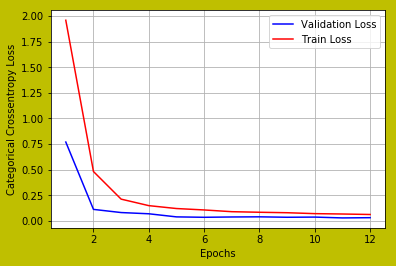

In [0]:
#evaluating model
score=convnet7.evaluate(x_test,y_test,verbose=0)
test_score7=score[0]
test_accuracy7=score[1]
train_accuracy7=max(convnet7_history.history['acc'])
print('test score :',test_score7)
print('test Accuracy :',test_accuracy7)
# error plot
x=list(range(1,epochs+1))
vy=convnet7_history.history['val_loss'] #validation loss
ty=convnet7_history.history['loss'] # train loss
plt_dynamic(x, vy, ty)

**Observation**:

In [0]:
from prettytable import PrettyTable
models=['3ConvNet with kernel 3x3',
        '5ConvNet with kernel 5x5',
        '7ConvNet with kernel 2x2']
training_accuracy=[train_accuracy3,train_accuracy5,train_accuracy7]
test_accuracy=[test_accuracy3,test_accuracy5,test_accuracy7]
INDEX = [1,2,3]
# Initializing prettytable
Model_Performance = PrettyTable()
# Adding columns
Model_Performance.add_column("INDEX.",INDEX)
Model_Performance.add_column("MODEL_NAME",models)
Model_Performance.add_column("TRAINING ACCURACY",training_accuracy)
Model_Performance.add_column("TESTING ACCURACY",test_accuracy)
#Model_Performance.add_column("TEST SCORE",test_score)

# Printing the Model_Performance
print(Model_Performance)

+--------+--------------------------+--------------------+------------------+
| INDEX. |        MODEL_NAME        | TRAINING ACCURACY  | TESTING ACCURACY |
+--------+--------------------------+--------------------+------------------+
|   1    | 3ConvNet with kernel 3x3 |       0.9951       |      0.9924      |
|   2    | 5ConvNet with kernel 5x5 |      0.99515       |      0.9938      |
|   3    | 7ConvNet with kernel 2x2 | 0.9845166666666667 |      0.9925      |
+--------+--------------------------+--------------------+------------------+
